# Prototype

# Part 1 : Running a Classifier

The initial goal of this prototype is to run a classifier on the provided.

The classifier is also only comparing itself to HS

In [1]:
%matplotlib notebook
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

testPath = '../data/hateval2019_en_test_clean.csv'
trainPath = '../data/hateval2019_en_train_clean.csv'

testSet = pd.read_csv(testPath)
trainSet = pd.read_csv(trainPath)

In [2]:
testSet.shape

(3000, 6)

In [3]:
trainSet.shape

(9000, 6)

In [4]:
testSet.head(10)

,Unnamed: 0,id,text,HS,TR,AG
0,0,34243,"@USER @USER @USER Oh, I could have gone on abo...",0,0,0
1,1,30593,Several of the wild fires in #california and #...,0,0,0
2,2,31427,@USER My question is how do you resettle a ref...,0,0,0
3,3,31694,"#Europe, you've got a problem! We must hurry...",1,0,0
4,4,31865,This is outrageous! #StopIllegalImmigration #...,1,0,0
5,5,33586,Must read. Its like looking into the future h...,0,0,0
6,6,34192,"""GET this WORSE THAN SCUM OUT OF OUR COUNTRY! ...",1,0,1
7,7,30879,@USER @USER @USER @USER This waste of Money mu...,1,0,1
8,8,30910,"These savages invade Our Country, disrupt citi...",1,0,1
9,9,30038,Wake up #America! ! We are currently giving ou...,1,0,0


In [5]:
trainSet.head(10)

,Unnamed: 0,id,text,HS,TR,AG
0,0,201,"Hurray, saving us $$$ in so many ways @USER @U...",1,0,0
1,1,202,Why would young fighting age men be the vast m...,1,0,0
2,2,203,@USER Illegals Dump their Kids at the border l...,1,0,0
3,3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,4,205,Orban in Brussels: European leaders are ignori...,0,0,0
5,5,206,@USER LEGAL is. Not illegal. #BuildThatWall,1,0,0
6,6,207,@USER @USER @USER Antifa are just a pack of dr...,0,0,0
7,7,208,Ex-Teacher Pleads Not guilty To Rape Charges h...,0,0,0
8,8,209,still places on our Bengali (Sylheti) class! i...,0,0,0
9,9,210,DFID Africa Regional Profile: July 2018 https:...,0,0,0


In [36]:
x = trainSet.text
y = trainSet.HS

x_res = testSet.text
y_res = testSet.HS

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(6750,)
(2250,)
(6750,)


# Adjusting Bag of Words

All of these are run through the Naive Bayes model

## N-Grams

Mono-Gram ACC: 0.680
Bi-Gram ACC: 0.704
Tri-Gram ACC: 0.708
Quad-Gram ACC: 0.708

Using a Tri-gram gave a very marginal 0.004% increase in prediction accuracy whilst using a Quad Gram gave similar results.
A Mono-gram had the worst results with an Accuracy Score of 0.68%.

Due to how small the increase from utilizing a higher n number for n-grams with the additional factor of how it complicates the vocabulary that is being collected by the vectorizer, it is better for future implementions with a smaller n-number. Utilizing the Goldilocks' Principle. An N number of 1 is not enough to give proper context for words so a number of 2 is best used instead

## Document Frequency

Min_DF Results:
1: 0.672
2: 0.704
3: 0.668
4: 0.704
5: 0.720
6: 0.712

Min_DF Results (%):
0.1 : 0.672
0.5 : 0.704
1   : 0.692
5   : 0.608
10  : 0.572

In [38]:
#Different Vectorizers utilizing different range of n-grams
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2), min_df=2)

In [39]:
x_train_dtm = vect.fit_transform(x_train)
x_train_dtm

<6750x11650 sparse matrix of type '<class 'numpy.int64'>'
	with 88316 stored elements in Compressed Sparse Row format>

In [40]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer=TfidfTransformer(use_idf=False).fit(x_train_dtm)
tfidf_transformer=TfidfTransformer(use_idf=True).fit(x_train_dtm)

x_train_tf = tf_transformer.transform(x_train_dtm)


x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

print(x_train_tf.shape, x_train_tfidf.shape)


(6750, 11650) (6750, 11650)


In [41]:
x_test_dtm = vect.transform(x_test)

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=10000)
nb = MultinomialNB()
svm = SVC()
rf = RandomForestClassifier(n_estimators = 100)

%time nb.fit(x_train_dtm, y_train)
%time lr.fit(x_train_dtm, y_train)
%time svm.fit(x_train_dtm, y_train)
%time rf.fit(x_train_dtm, y_train)

Wall time: 2.97 ms
Wall time: 331 ms
Wall time: 4.89 s
Wall time: 4.64 s


RandomForestClassifier()

In [43]:
from sklearn import metrics

y_pred_class_nb = nb.predict(x_test_dtm)
y_pred_class_lr = lr.predict(x_test_dtm)
y_pred_class_svm = svm.predict(x_test_dtm)
y_pred_class_rf = svm.predict(x_test_dtm)

nb_acc = metrics.accuracy_score(y_test, y_pred_class_nb)
lr_acc = metrics.accuracy_score(y_test, y_pred_class_lr)
svm_acc = metrics.accuracy_score(y_test, y_pred_class_svm)
rf_acc = metrics.accuracy_score(y_test, y_pred_class_rf)

In [44]:
y_pred_prob_lr = lr.predict_proba(x_test_dtm)[:,1]
y_pred_prob_nb = nb.predict_proba(x_test_dtm)[:,1]
y_pred_prob_svm = nb.predict_proba(x_test_dtm)[:,1]
y_pred_prob_rf = nb.predict_proba(x_test_dtm)[:,1]

auc_lr = metrics.roc_auc_score(y_test, y_pred_prob_lr)
auc_nb = metrics.roc_auc_score(y_test, y_pred_prob_nb)
auc_svm = metrics.roc_auc_score(y_test, y_pred_prob_svm)
auc_rf = metrics.roc_auc_score(y_test, y_pred_prob_rf)

In [45]:
accuracy_array = [nb_acc, lr_acc, svm_acc, rf_acc]
classifiers = ['NB', 'LR', 'SVM', 'RF']
data = pd.DataFrame(accuracy_array, columns=['Accuracy'], index=classifiers)
data

,Accuracy
NB,0.761778
LR,0.788889
SVM,0.790222
RF,0.790222


In [46]:
arry_roc = [auc_nb, auc_lr, auc_svm, auc_rf]
classifiers = ['NB', 'LR', 'SVM', 'RF']
data = pd.DataFrame(accuracy_array, columns=['AUC'], index=classifiers)
data

,AUC
NB,0.761778
LR,0.788889
SVM,0.790222
RF,0.790222


<IPython.core.display.Javascript object>


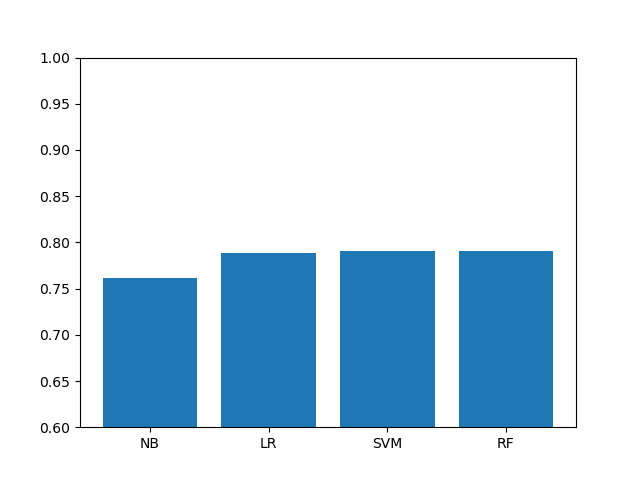

In [48]:
import matplotlib.pyplot as plt
plt.clf()
plt.bar(classifiers, accuracy_array)
plt.ylim(0.6, 1.00)
plt.show()

In [33]:
'''cm = metrics.confusion_matrix(y_test, y_pred_class_nb)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)'''

"cm = metrics.confusion_matrix(y_test, y_pred_class_nb)\n\nfig, ax = plt.subplots(figsize=(7.5, 7.5))\nax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)\nfor i in range(cm.shape[0]):\n    for j in range(cm.shape[1]):\n        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')\n \nplt.xlabel('Predictions', fontsize=18)\nplt.ylabel('Actuals', fontsize=18)\nplt.title('Confusion Matrix', fontsize=18)"

In [19]:
x_test[(y_pred_class_nb==1) & (y_test==0)]

6448    Nah If i kiss my girl my dick gonna get hard &...
5340    When you're a childish bitch https://t.co/z0Rs...
8866    Train to Become a #feminized 2-Hole Whore like...
5659    My dick is like yoga for your vagina... It'll ...
4801    How can a bitch fuck with a man who has a girl...
                              ...                        
7916    Response to @USER=hysterical. Many women suffe...
8412                        You’re a bitch ass cunt @USER
8287    Trump is a piece of shit and I hope he rots in...
8351    @USER And the son of a bitch can't buy it for ...
8832    Im a skank for understanding the very basics o...
Name: text, Length: 216, dtype: object

In [20]:
x_test[(y_pred_class_nb==0) & (y_test==1)]

8591    @USER @USER People in Eu & the US dont seem 2u...
2828    Presidential determination for the number of r...
728     Sheriff: Suspect in shooting of Humboldt Count...
5139    @USER I know you do, slut https://t.co/Q39cuUKocS
5343    If she's doin this, she's about to suck the so...
                              ...                        
5053    When he runs his hand up the back of your head...
5000    What's worse than a girl who gives rough handj...
5468    @USER  come on woman do your job right #WomenSuck
8588    @USER @USER I bet her parents dont claim her e...
5222    @USER Leave my ship alone you whore https://t....
Name: text, Length: 109, dtype: object